## Case study classification project

In [41]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [1]:
conda install -c conda-forge jupyter_contrib_nbextensions

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [43]:
# df = pd.read_csv('creditcardmarketing.csv')

In [44]:
df_original = pd.read_excel(r'data/creditcardmarketing.xlsx')

In [45]:
# save as a csv file to use in the SQL task
import csv
df_original.to_csv(r'new_creditcardmarketing_original.csv', index = False)

In [46]:

# create a copy of the dataaet
df = df_original

###  EDA - exploratory data analysis - get to know the data

In [47]:
# check information about the dataset
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [48]:
# cheack shape
df.shape

(18000, 17)

In [49]:
# print the sum of null values 
print(df.isnull().sum())

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64


In [50]:
# standize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [51]:
# find the percentage of missing values
pct_missing=24/18000
pct_missing

0.0013333333333333333

We found few missing values (less than 20%). so we are not droping them.<br/>
Since the balances columns are float, we will fill them with the mean

In [52]:
# fill nulls with the means

col_miss_values= ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

mean_average_balance = df['average_balance'].mean
df['average_balance'] = df['average_balance'].fillna(mean_average_balance)

mean_average_balance = df['q1_balance'].mean
df['q1_balance'] = df['q1_balance'].fillna(mean_average_balance)

mean_q2_balance = df['q2_balance'].mean
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)

mean_q3_balance = df['q3_balance'].mean
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)

mean_q4_balance = df['q4_balance'].mean
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
                                           


In [53]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.5,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.0,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.0,2140.0,1357.0,982.0,365.0


### Get the sweet summary stats on each column to understand the distribution better

In [54]:
#statistical distribution
df.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056
std,5196.296758,0.472501,0.797009,0.427341,1.114182
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000


### Get a  representation of the numbers 

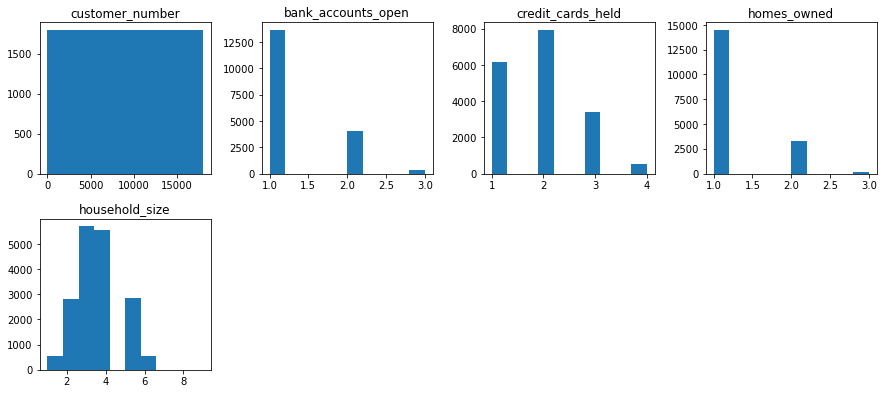

In [55]:
# using pandas
hist = df.hist(figsize=(15,10),layout=(3,4), grid=False)

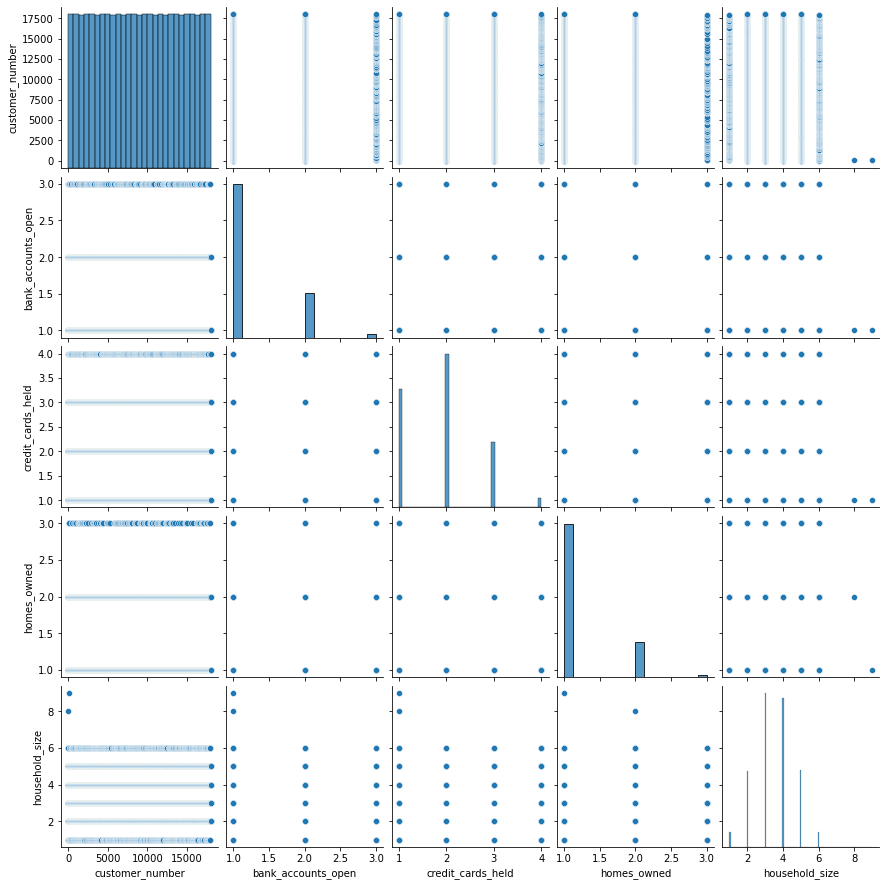

In [56]:
# check relationships with seaborn
sns.pairplot(df)
plt.show()

Only the household_size has a normal distribution.

In [57]:
# # check for multicollinearity 
# corr_matrix=df.corr(method='pearson')  # default
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

The graph proves the absence of multicollinearity. 

"The linear model makes the following assumptions
- Require a linear relationship between the dependent and independent variables.
- The error terms (residuals) need to be normally distributed. 
- If not weights can be introduced to penalize some observations in the error metric.
Independent variables are normally distributed.
If not (apply transformation Box-Cox)
- Absence of multicollinearity.
- Independent observations (not repeated)"

In [58]:
# check for more claning
# df.head(20)
# df.tail(20)
# drop customer_number
df=df.drop(['customer_number'], axis=1)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.5,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.0,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.0,2140.0,1357.0,982.0,365.0
5,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.5,132.0,391.0,285.0,306.0
8,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.0,894.0,891.0,882.0,1353.0
9,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


It seems that there is no need to make more cleaning. Neither for Bucketing features.

In [59]:
df.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

In [60]:
# label / encode any categorical columns 

cat = df.select_dtypes(include = np.object)
cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,No,High,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,No,Medium,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,No,Medium,Yes,276.5,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,No,High,No,1219.0,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,No,Medium,Yes,1211.0,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes,167.5,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,No,Low,Yes,850.5,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,No,Low,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,No,Medium,Yes,1022.25,626.0,983.0,865.0,1615.0


Frequency analysis of column:  offer_accepted
Frequency analysis of column:  reward
Frequency analysis of column:  mailer_type
Frequency analysis of column:  income_level
Frequency analysis of column:  overdraft_protection
Frequency analysis of column:  credit_rating
Frequency analysis of column:  own_your_home
Frequency analysis of column:  average_balance


TypeError: '<' not supported between instances of 'float' and 'method'

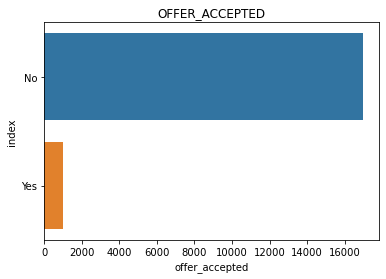

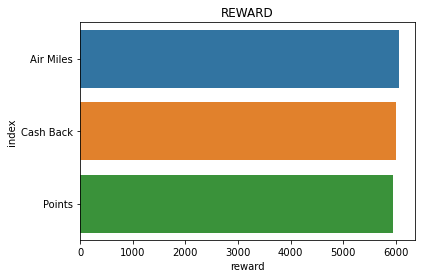

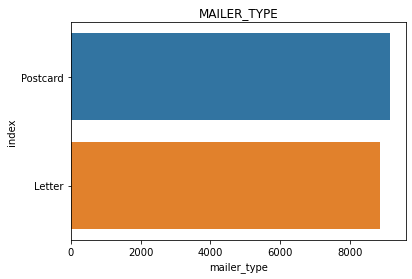

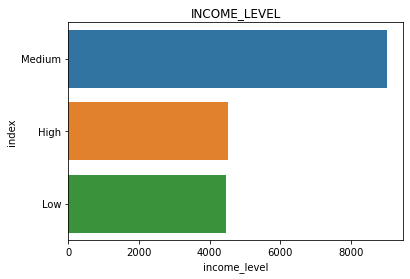

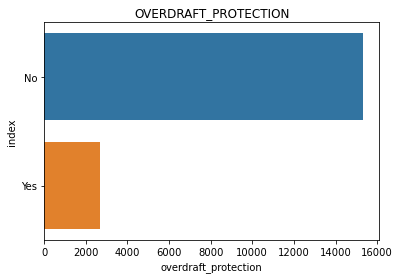

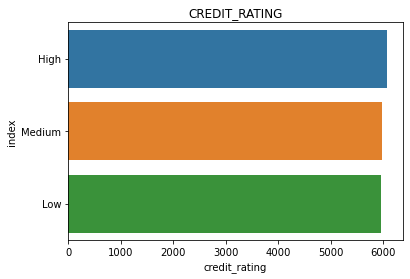

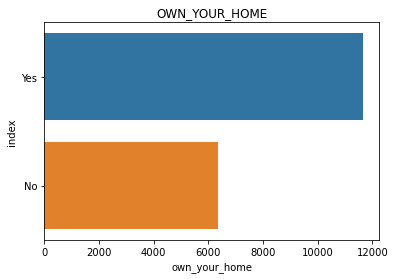

<Figure size 432x288 with 0 Axes>

In [61]:
# checking all the categorical columns
cols_cat = list(df.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()

In [62]:
# locate the target column in the last position
cols = list(df.columns)
cols = cols[1:]+[cols[0]]
df = df[cols]


In [63]:
df.head()

,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted
0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,No
1,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,No
2,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.5,367.0,352.0,145.0,242.0,No
3,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.0,1578.0,1760.0,1119.0,419.0,No
4,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.0,2140.0,1357.0,982.0,365.0,No


In [64]:
df.dtypes

reward                  object
mailer_type             object
income_level            object
bank_accounts_open       int64
overdraft_protection    object
credit_rating           object
credit_cards_held        int64
homes_owned              int64
household_size           int64
own_your_home           object
average_balance         object
q1_balance              object
q2_balance              object
q3_balance              object
q4_balance              object
offer_accepted          object
dtype: object

In [65]:
# convert balances to float

df['average_balance'] = pd.to_numeric(df.average_balance, errors='coerce')
df['q1_balance'] = pd.to_numeric(df.q1_balance, errors='coerce')
df['q2_balance'] = pd.to_numeric(df.q2_balance, errors='coerce')
df['q3_balance'] = pd.to_numeric(df.q3_balance, errors='coerce')
df['q4_balance'] = pd.to_numeric(df.q4_balance, errors='coerce')


In [66]:
df.dtypes

reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
offer_accepted           object
dtype: object

### Outliers

### Box Plots
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<AxesSubplot:>

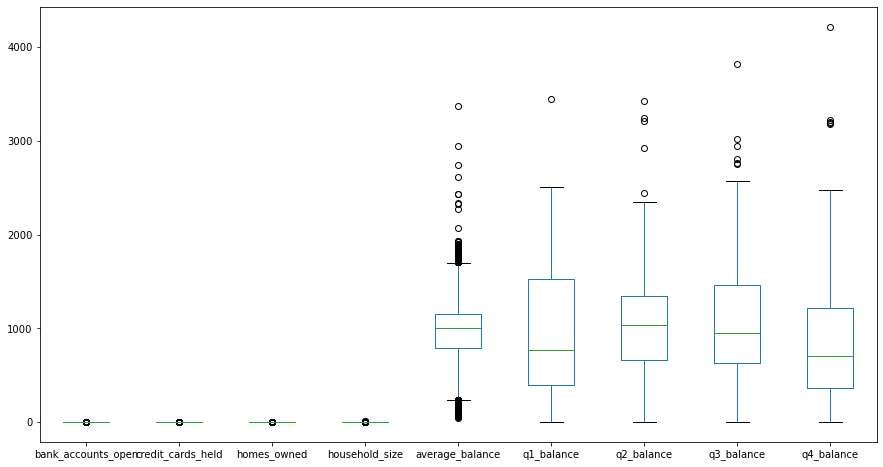

In [67]:
# check outliers
df.boxplot(grid=False, figsize= (15,8))

##### Density Plots

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

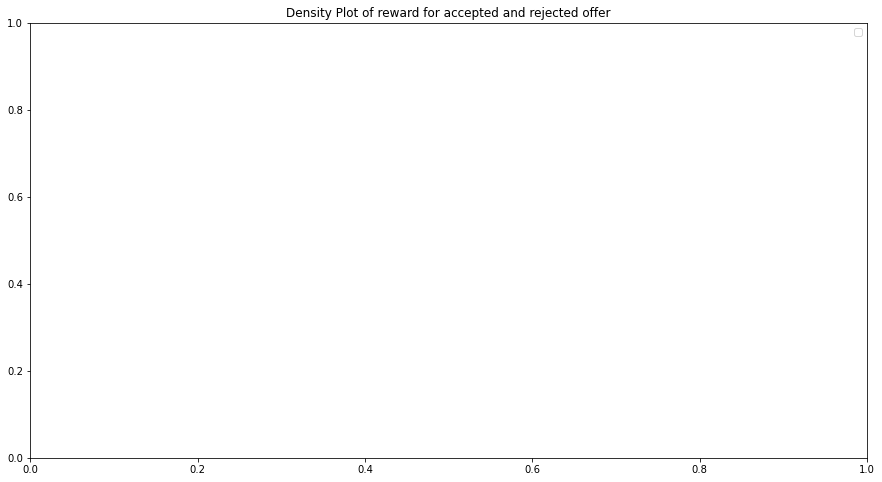

In [71]:
# # replace yes by 1 and no by 0
# df = df.replace({'offer_accepted': {'Yes': 1,'No': 0}})


plt.figure(figsize=(15,8))
sns.kdeplot(df["reward"][df.offer_accepted  == 1], shade=True)
sns.kdeplot(df["reward"][df.offer_accepted  == 0], shade=True)
plt.legend(['offer_accepted ', 'offer_rejected'])
plt.title('Density Plot of reward for accepted and rejected offer')
# limit x axis to zoom on most information. there are a few outliers in fare. 
# plt.xlim(-20,200)
plt.show()

In [69]:
# plt.figure(figsize=(15,8))
# sns.kdeplot(df["Fare"][df.Survived == 1], shade=True)
# sns.kdeplot(df["Fare"][df.Survived == 0], shade=True)
# plt.legend(['Survived', 'Died'])
# plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# # limit x axis to zoom on most information. there are a few outliers in fare. 
# plt.xlim(-20,200)
# plt.show()

In [70]:
# plt.figure(figsize=(15,8))
# sns.kdeplot(df["reward"][df.offer_accepted == 'Yes'], shade=True)
# sns.kdeplot(df["reward"][df.offer_accepted == 'No'], shade=True)
# plt.legend(['Accepted', 'Declined'])
# plt.title('Density Plot - reward for accepting and declining offer')
# plt.show()

### pre processing 


In [ ]:
cat.columns

In [ ]:
categorical = pd.get_dummies(cat, columns =['reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance', 'offer_accepted'],drop_first=True)
categorical.head()


In [ ]:
categorical['offer_accepted_Yes'].value_counts()

In [ ]:
pct_offer_accepted = 1023/18000
pct_offer_accepted

In [ ]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

In [ ]:
References:
- women who code: munibootcamp of data science
    